# COMPUTER VISION AND INTERNET OF THINGS
# TASK 2 : OBJECT /IMAGE COLOR DETECTION
# AUTHOR: PRIYANKA SUNIL KIZHEKETHOTTAM


In [2]:
#install cv for cv2
!pip install opencv-python
import cv2


In [3]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from skimage import io
from skimage.color import rgb2lab,hsv2rgb,lab2rgb,deltaE_cie76,rgb2rgbcie

%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

Input type<class 'tuple'>
Shape:(165, 306, 3)


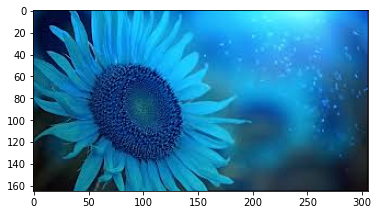

In [5]:
#Read image
image =cv2.imread('image.jpg')
#Display Image
print("Input type{}".format(type(image.shape)))
print("Shape:{}".format(image.shape))
plt.imshow(image)

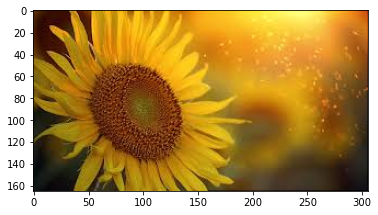

In [6]:
#Converting the image to its normal colors
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

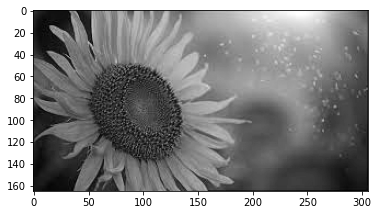

In [7]:
#Converting the image to its gray from rgb
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

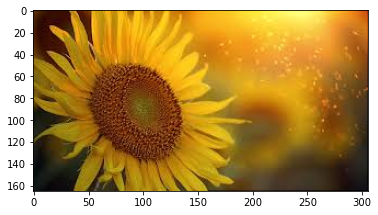

In [8]:
#Loading default color flag
image = cv2.cvtColor(image, cv2.IMREAD_COLOR)
plt.imshow(image)

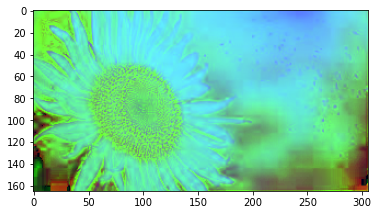

In [9]:
#Converting the image to its HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image, cmap='hsv')

# Define Hex and Color Identification using KMeans

In [10]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [11]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [12]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (100, 60), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (10, 15))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors


[array([190.58113731, 134.78363384,  20.80166436]),
 array([74.01149425, 51.03831418, 23.31226054]),
 array([244.44094488, 183.62519685,  27.5511811 ]),
 array([128.34126984,  88.72486772,  22.52513228]),
 array([252.19323671, 222.1352657 ,  76.82608696]),
 array([218.03663501, 154.6431479 ,  20.93215739]),
 array([35.84267241, 24.22413793, 15.79956897]),
 array([161.25274725, 113.7020757 ,  18.55677656]),
 array([110.15612382,  58.04172275,  17.93539704]),
 array([234.21969697, 159.10606061,  47.75      ])]

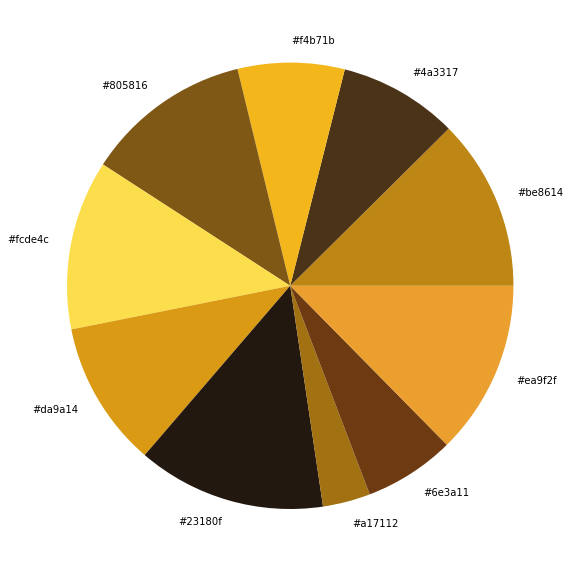

In [13]:
get_colors(get_image('image.jpg'), 10, True)

In [14]:
import os
IMAGE_DIRECTORY = 'images'
COLORS = {
    'RED':[255, 0, 0],
    'YELLOW': [255, 255, 0],
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],    
    'PURPLE':[128,0,128]
}
images = []
# file images contains image1 to 7
for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

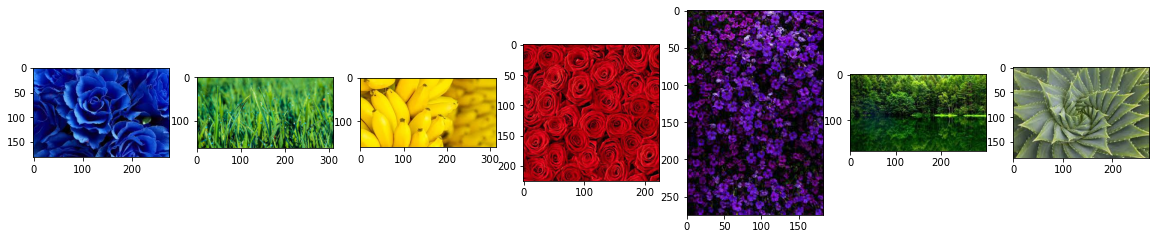

In [15]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [16]:
def match_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [20]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

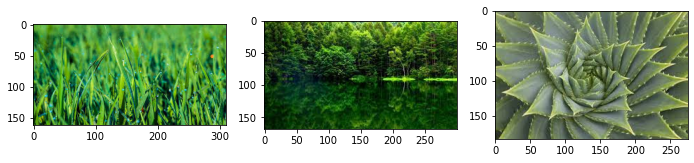

In [21]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

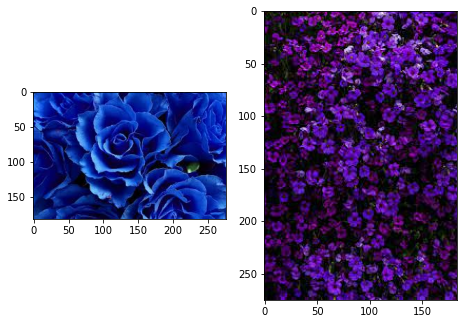

In [22]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

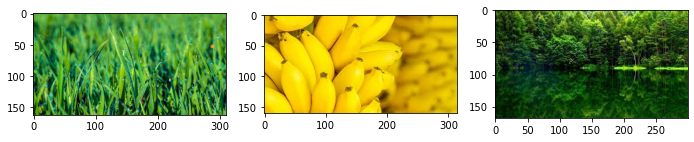

In [23]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

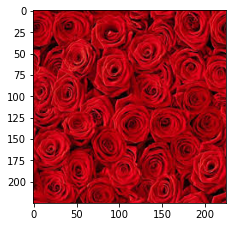

In [25]:
# Search for RED
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

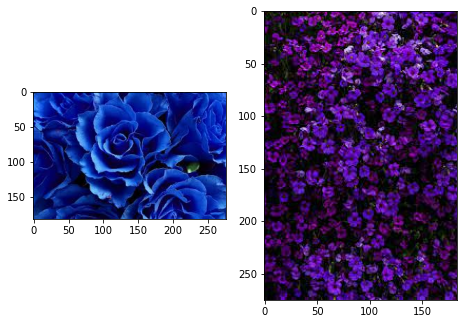

In [26]:
# Search for PURPLE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['PURPLE'], 60, 5)

# Conclusion this dectects color and matching hue